In [88]:
import numpy as np
import random
import matplotlib.pyplot as plt
from igraph import Graph
import networkx as nx
import time
import math

### Step 1

In [68]:
def weighted_graph(v=100, e=500):
    verticies = [i for i in range(v)]
    weights = [random.random() for i in range(math.ceil(e/2))]
    edges = []
    G = nx.Graph()
    G.add_nodes_from(verticies)
    for i in range(math.ceil(e/2)):
        a = random.choice(verticies)
        b = random.choice(verticies)
        while a == b:
            b = random.choice(verticies)
        G.add_edge(a, b, weight=weights[i])
        G.add_edge(b, a, weight=weights[i])
    
    return G 

In [65]:
def get_adj_list_from_graph(G):
    return {i[0]: list(i[1].keys()) for i in G.adjacency()}

In [70]:
G = weighted_graph()

{(0, 25): Text(0.3376579516625686, 0.03263726502269497, '0.8641933348821197'),
 (0,
  20): Text(0.17760874303650856, -0.050547764410742727, '0.6588426937041252'),
 (0, 53): Text(0.2416279608189951, -0.07678787419843262, '0.3276785195622032'),
 (0, 28): Text(0.21818790283945919, 0.18669516086391857, '0.344839063305577'),
 (0,
  85): Text(0.04468781423928214, -0.028012454524881027, '0.6636787670373088'),
 (0, 5): Text(0.10472987243575543, -0.05575220651672187, '0.8823755298953558'),
 (0, 41): Text(0.05975562227264505, -0.0659630587117726, '0.669601538119826'),
 (0,
  81): Text(0.4044020848560455, -0.22212483769791472, '0.40941215463820113'),
 (1,
  64): Text(0.05149334454989105, -0.15932866711945112, '0.37431897067356734'),
 (1, 54): Text(0.12766731351526595, 0.10343638432398364, '0.4785848043007279'),
 (1,
  11): Text(0.39476119142566557, -0.02151450206767605, '0.024844632331227134'),
 (1,
  71): Text(0.05418318428818183, -0.02301321992534166, '0.7419638539003413'),
 (1,
  20): Text(0.1

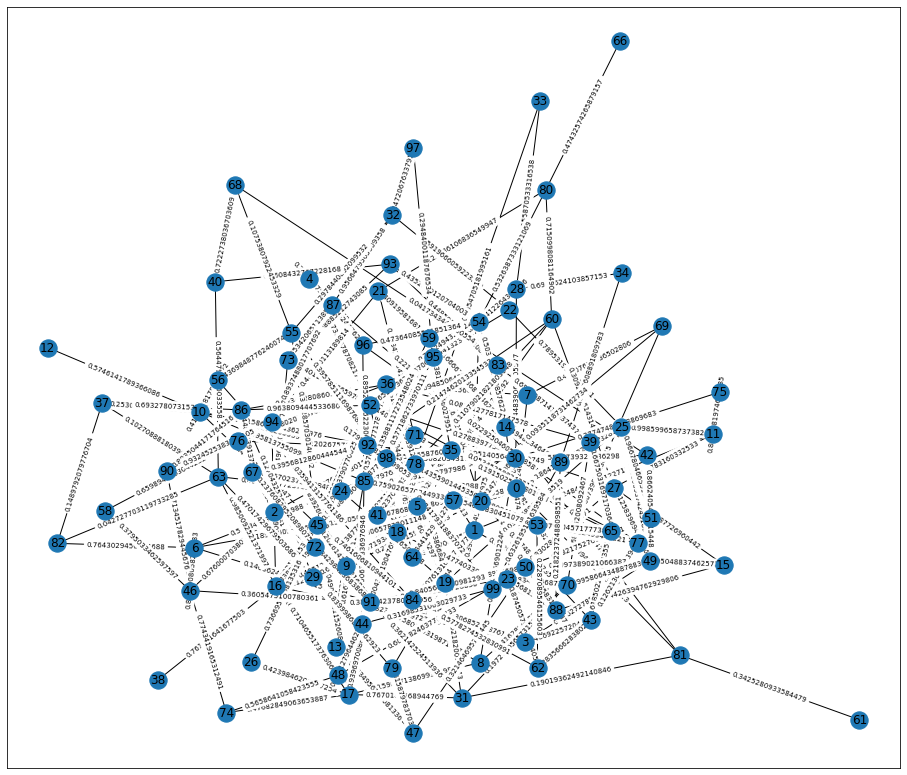

In [85]:
plt.figure(figsize=(16, 14))
pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, font_size=7)

In [117]:
def generate_vert(graph):
    a = random.choice(range(len(graph)))
    b = random.choice(range(len(graph)))
    while a == b:
        b = random.choice(graph.nodes())
    
    return a, b

In [100]:
def time_dijstra(graph, a, b):
    start = time.time()
    path = nx.dijkstra_path(graph, a, b)
    finish = time.time()
    return  path, finish - start
    

In [103]:
def time_bellman_ford(graph,a, b):
    start = time.time()
    path = nx.bellman_ford_path(graph, a, b)
    finish = time.time()
    return  path, finish - start

In [207]:
P, T_d, T_bf = [], [], []
for i in range(5):
    a, b = generate_vert(G)
    td = 0
    tbf = 0
    for j in range(10):
        p0, t0 = time_dijstra(G, a, b)
        p1, t1 = time_bellman_ford(G, a, b)
        td += t0
        tbf += t1
    T_d.append(td / 10)
    T_bf.append(tbf / 10)

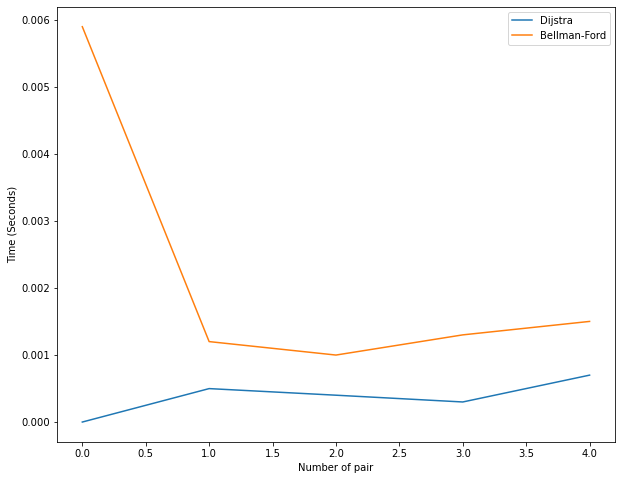

In [208]:
plt.figure(figsize=(10, 8))
plt.plot(T_d, label='Dijstra')
plt.plot(T_bf, label='Bellman-Ford')
plt.ylabel('Time (Seconds)')
plt.xlabel('Number of pair')
plt.legend()
plt.show()

In [209]:
print(f"Average time of Dijsra's method: {round(np.mean(T_d), 6)}")
print(f"Average time of Bellman-Ford's method: {round(np.mean(T_bf), 6)}")

Average time of Dijsra's method: 0.00038
Average time of Bellman-Ford's method: 0.00218


### Step 2

In [132]:
def gen_cells(n=10, m=20, blocked=40):
    grid = nx.grid_2d_graph(n, m)
    for b in range(blocked):
        i = random.randint(0, n - 1)
        j = random.randint(0, m - 1)
        if (i, j) in grid.nodes():
            grid.remove_node((i, j))
    return grid

In [133]:
G_2 = gen_cells()

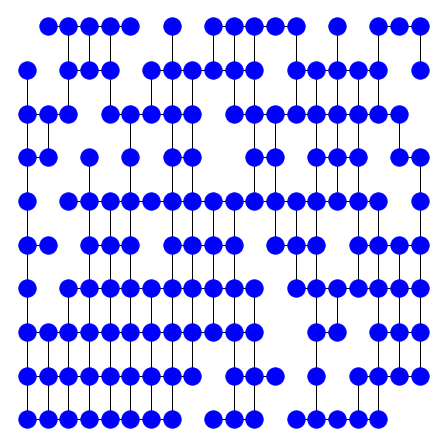

In [144]:
plt.figure(figsize=(6,6))
pos=nx.spring_layout(G_2)
pos = {(x,y):(y,-x) for x, y in G_2.nodes()}
nx.draw(G_2, pos=pos, 
        node_color='blue', 
        with_labels=False,
        node_size=300)

In [178]:
T_a, Path_len, path = [], [], []
for i in range(5): 
    t1 = time.time()
    start = random.choice(list(G_2.nodes()))
    target = random.choice(list(G_2.nodes()))
    path.append(nx.astar_path(G_2, start, target))
    Path_len.append(nx.astar_path_length(G_2, start, target))
    T_a.append(time.time() - t1)

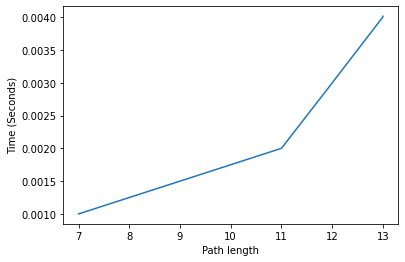

In [210]:
plt.plot(sorted(Path_len), sorted(T_a))
plt.xlabel('Path length')
plt.ylabel('Time (Seconds)');

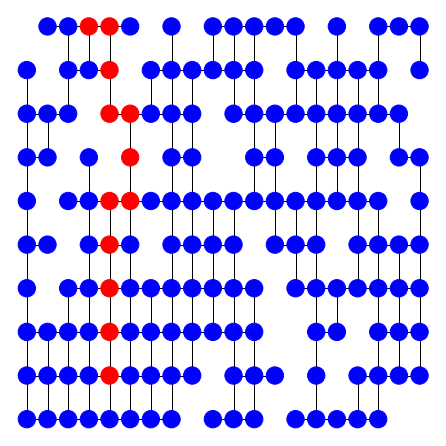

In [200]:
plt.figure(figsize=(6,6))
pos=nx.spring_layout(G_2)
pos = {(x,y):(y,-x) for x, y in G_2.nodes()}
nx.draw(G_2, pos=pos, 
        node_color=['red' if i in path[2] else 'blue' for i in G_2.nodes()], 
        with_labels=False,
        node_size=300)